# Visualizing College Degree Earnings

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

Rank - Rank by median earnings (the dataset is ordered by this column).
Major_code - Major code.
Major - Major description.
Major_category - Category of major.
Total - Total number of people with major.
Sample_size - Sample size (unweighted) of full-time.
Men - Male graduates.
Women - Female graduates.
ShareWomen - Women as share of total.
Employed - Number employed.
Median - Median salary of full-time, year-round workers.
Low_wage_jobs - Number in low-wage service jobs.
Full_time - Number employed 35 hours or more.
Part_time - Number employed less than 35 hours.

In [46]:
import numpy as np
import pandas as pd
import matplotlib as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [4]:
degrees = pd.read_csv("/Users/Taylor/OneDrive/Documents/DC/Dataquest/Projects/Visualizing Earnings Based On College Majors/recent-grads.csv", encoding = "Latin-1")

In [7]:
degrees.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [8]:
degrees.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [9]:
#Drop rows with missing values
degrees = degrees.dropna()

In [10]:
degrees.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


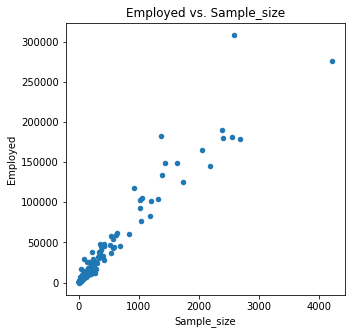

In [17]:
degrees.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,5))

Makes sense that two are highly correlated since more employed means higher chance to select someone in sample

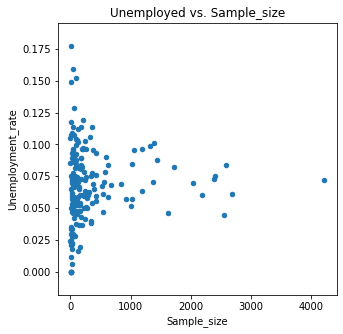

In [18]:
degrees.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployed vs. Sample_size', figsize=(5,5))

When sample sizes get small, results get crazy. Need a minimum sample size to have valid results

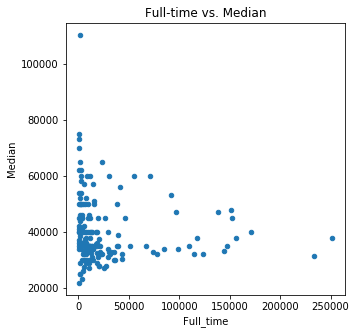

In [19]:
degrees.plot(x='Full_time', y='Median', kind='scatter', title='Full-time vs. Median', figsize=(5,5))

Weak correlation. The more full-time workers, the lower the salary. Makes sense if supply is greater than demand. 

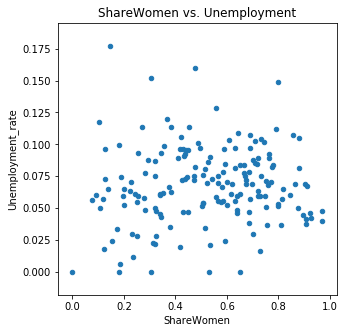

In [20]:
degrees.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen vs. Unemployment', figsize=(5,5))

No correlation between Women and Unemployment

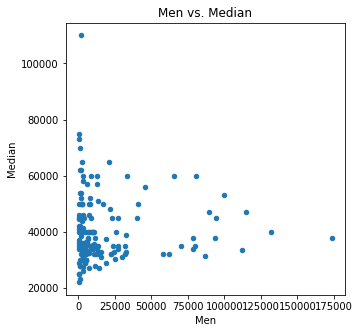

In [21]:
degrees.plot(x='Men', y='Median', kind='scatter', title='Men vs. Median', figsize=(5,5))

Weak correlation. The more full-time male workers, the lower the salary. Makes sense if supply is greater than demand

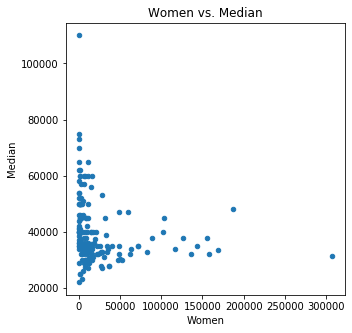

In [22]:
degrees.plot(x='Women', y='Median', kind='scatter', title='Women vs. Median', figsize=(5,5))

Weak correlation. The more full-time female workers, the lower the salary. Makes sense if supply is greater than demand

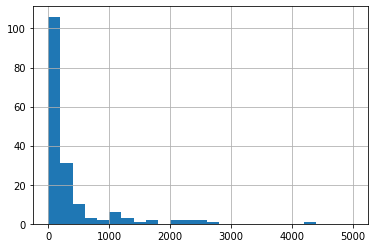

In [26]:
degrees['Sample_size'].hist(bins=25, range=(0,5000))

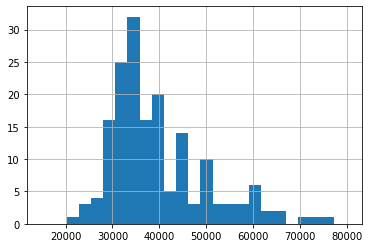

In [32]:
degrees['Median'].hist(bins=25, range=(15000,80000))

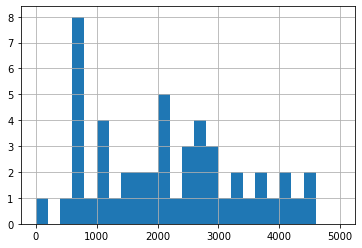

In [28]:
degrees['Employed'].hist(bins=25, range=(0,5000))

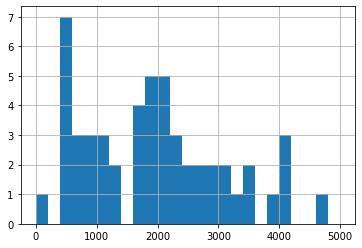

In [33]:
degrees['Full_time'].hist(bins=25, range=(0,5000))

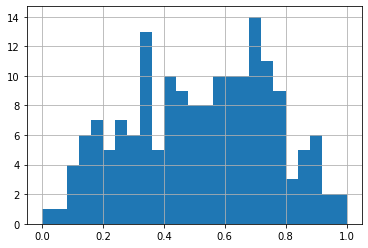

In [35]:
degrees['ShareWomen'].hist(bins=25, range=(0,1))

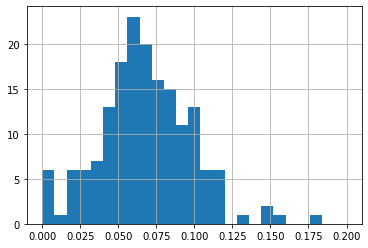

In [38]:
degrees['Unemployment_rate'].hist(bins=25, range=(0,.2))

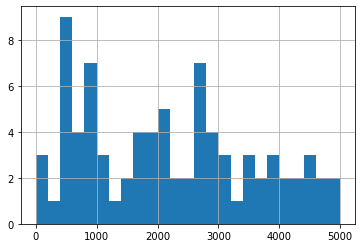

In [39]:
degrees['Men'].hist(bins=25, range=(0,5000))

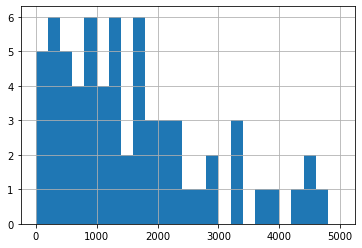

In [40]:
degrees['Women'].hist(bins=25, range=(0,5000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B89EE8C08>,
      dtype=object)

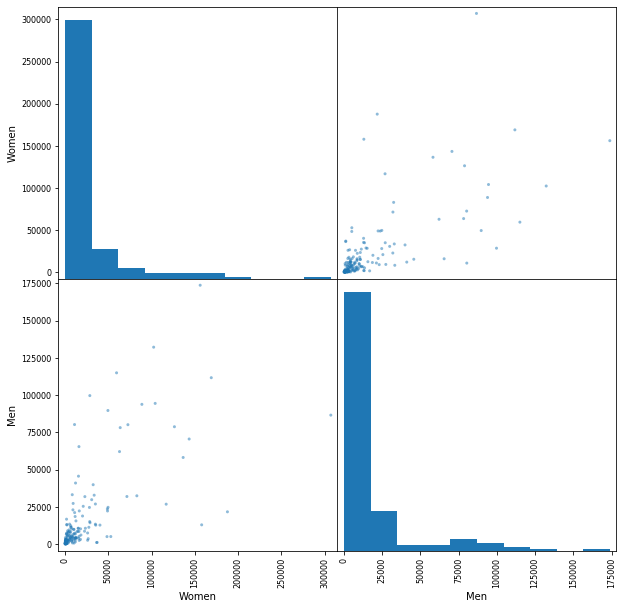

In [47]:
scatter_matrix(degrees[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B8C554E88>,
      dtype=object)

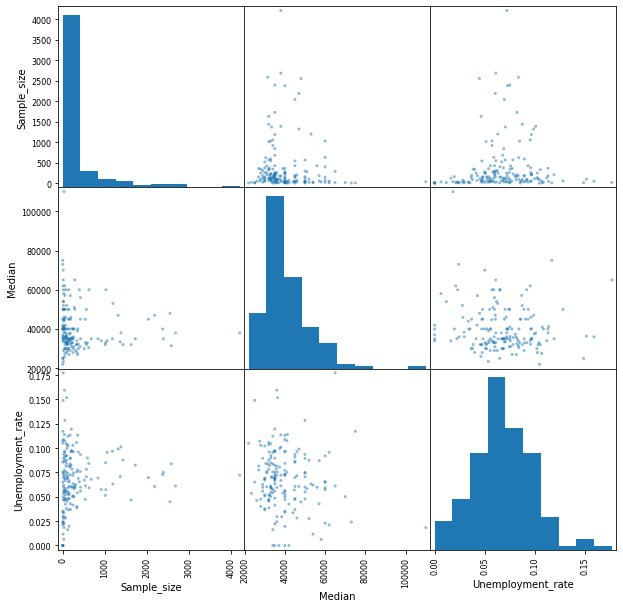

In [48]:
scatter_matrix(degrees[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

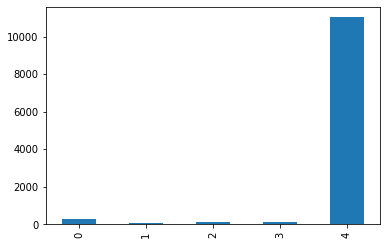

In [49]:
degrees[:5]['Women'].plot(kind='bar')

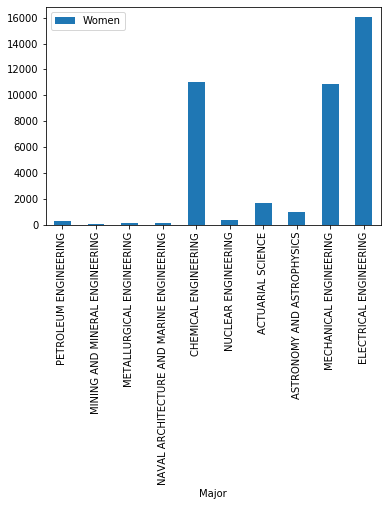

In [51]:
degrees[:10].plot.bar(x='Major', y='Women')

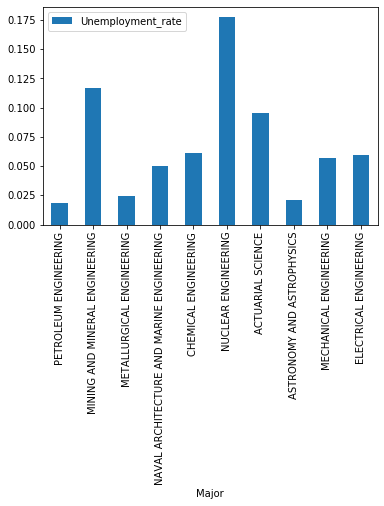

In [53]:
degrees[:10].plot.bar(x='Major', y='Unemployment_rate')